# Compare USDM & SPI - Quality Control - Sum Zero Category Area Functions

a. stein 5.16.2022

Checkin in on the data

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import rioxarray
import rasterio as rio
import pandas as pd
import geopandas as gpd

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle
import ndrought.compare as compare
import ndrought.plotting as ndplot

Populating the interactive namespace from numpy and matplotlib


/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if sys.path[0] == '':


Load in and setup area fractions

In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'

spi_intervals = ['1y', '2y', '5y', '14d', '30d', '90d', '180d', '270d']

# grab the product already made
paired_ds = xr.open_dataset(f'{dm_path}/ndrought_products/paired_USDM_SPI.nc')
paired_ds

<xarray.Dataset>
Dimensions:      (lat: 84, lon: 188, index: 1148)
Coordinates:
  * lat          (lat) float64 48.98 48.94 48.9 48.86 ... 45.61 45.57 45.53
  * lon          (lon) float64 -124.7 -124.7 -124.6 ... -117.0 -117.0 -116.9
  * index        (index) int64 0 1 2 3 4 5 6 ... 1142 1143 1144 1145 1146 1147
Data variables:
    spatial_ref  int64 ...
    USDM         (index, lat, lon) float64 ...
    USDM Date    (index) datetime64[ns] ...
    spi_1y       (index, lat, lon) float32 ...
    spi_2y       (index, lat, lon) float32 ...
    spi_5y       (index, lat, lon) float32 ...
    spi_14d      (index, lat, lon) float32 ...
    spi_30d      (index, lat, lon) float32 ...
    spi_90d      (index, lat, lon) float32 ...
    spi_180d     (index, lat, lon) float32 ...
    spi_270d     (index, lat, lon) float32 ...
    SPI Date     (index) datetime64[ns] ...
Attributes:
    author:       a. stein 5/2/2022
    description:  USDM and SPI matched to USDM data cutoff dates, as describe...
    USDM Date:    this contains the original dates for USDM
    SPI Date:     this contains the original dates for SPI

In [3]:
usdm_af = wrangle.compile_cat_area_fracs(paired_ds['USDM'], var_prefix="USDM")
usdm_af

<xarray.Dataset>
Dimensions:           (index: 1148)
Coordinates:
  * index             (index) int64 0 1 2 3 4 5 ... 1143 1144 1145 1146 1147
Data variables:
    USDM_neutral_wet  (index) float64 1.0 1.0 1.0 1.0 ... 0.3866 0.3989 0.3994
    USDM_D0           (index) float64 0.0 0.0 0.0 0.0 ... 0.04413 0.0394 0.03567
    USDM_D1           (index) float64 0.0 0.0 0.0 0.0 ... 0.2084 0.2225 0.2451
    USDM_D2           (index) float64 0.0 0.0 0.0 0.0 ... 0.2044 0.2265 0.216
    USDM_D3           (index) float64 0.0 0.0 0.0 0.0 ... 0.1565 0.1127 0.1038
    USDM_D4           (index) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    description:  Fraction of total non-nan area that is in that USDM drought...

In [4]:
caf_list = [usdm_af]

for interval in tqdm(spi_intervals):
    spi_af = wrangle.compile_cat_area_fracs(paired_ds[f'spi_{interval}'], var_prefix=f"spi_{interval}")
    caf_list.append(spi_af)
    spi_af = None

  0%|          | 0/8 [00:00<?, ?it/s]

In [5]:
caf_ds = xr.merge(caf_list)
caf_ds

<xarray.Dataset>
Dimensions:               (index: 1148)
Coordinates:
  * index                 (index) int64 0 1 2 3 4 5 ... 1143 1144 1145 1146 1147
Data variables: (12/54)
    USDM_neutral_wet      (index) float64 1.0 1.0 1.0 ... 0.3866 0.3989 0.3994
    USDM_D0               (index) float64 0.0 0.0 0.0 ... 0.04413 0.0394 0.03567
    USDM_D1               (index) float64 0.0 0.0 0.0 ... 0.2084 0.2225 0.2451
    USDM_D2               (index) float64 0.0 0.0 0.0 ... 0.2044 0.2265 0.216
    USDM_D3               (index) float64 0.0 0.0 0.0 ... 0.1565 0.1127 0.1038
    USDM_D4               (index) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...                    ...
    spi_270d_neutral_wet  (index) float64 0.5527 0.5833 0.6667 ... 0.4802 0.5023
    spi_270d_D0           (index) float64 0.08534 0.09859 ... 0.06578 0.0665
    spi_270d_D1           (index) float64 0.1769 0.1468 0.1102 ... 0.2603 0.2643
    spi_270d_D2           (index) float64 0.02587 0.02994 ... 0.05173 0.0471
    spi_270d_D3           (index) float64 0.04407 0.03912 ... 0.0768 0.05964
    spi_270d_D4           (index) float64 0.1151 0.1023 ... 0.06522 0.06019
Attributes:
    description:  Fraction of total non-nan area that is in that USDM drought...

In [6]:
dm_vars = ['USDM']
dm_vars.extend([f'spi_{interval}' for interval in spi_intervals])
dm_vars

['USDM',
 'spi_1y',
 'spi_2y',
 'spi_5y',
 'spi_14d',
 'spi_30d',
 'spi_90d',
 'spi_180d',
 'spi_270d']

In [7]:
cats = ['neutral_wet', 'D0', 'D1', 'D2', 'D3', 'D4']

In [8]:
caf_ds['USDM Date'] = paired_ds['USDM Date']
caf_ds['SPI Date'] = paired_ds['SPI Date']

Let's save this out finally.

In [9]:
caf_path = f'{dm_path}/ndrought_products/paired_USDM_SPI_caf.nc'

if not os.path.exists(caf_path):
    caf_ds.to_netcdf()

Check zero-sum

In [10]:
len(dm_vars)

9

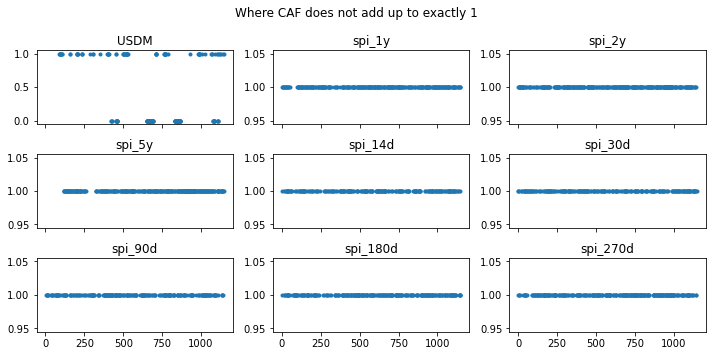

In [11]:
fig, axs = plt.subplots(3,3, figsize=(10,5), sharex=True)

for ax, dm_var in zip(axs.ravel(), dm_vars):
    dms = [f'{dm_var}_{cat}' for cat in cats]
    summed = caf_ds[dms].to_array().sum("variable")
    errors = summed[summed != 1.0]
    ax.plot(errors, marker='.', linestyle='')
    ax.set_title(dm_var)

fig.suptitle('Where CAF does not add up to exactly 1')

plt.tight_layout()

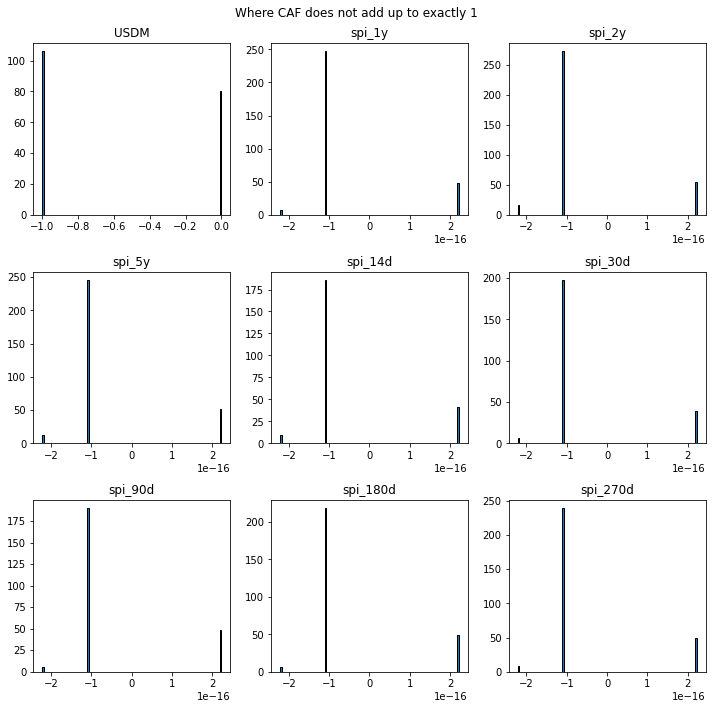

In [12]:
fig, axs = plt.subplots(3,3, figsize=(10,10))

summed_dict = {}
error_dict = {}

for ax, dm_var in zip(axs.ravel(), dm_vars):
    dms = [f'{dm_var}_{cat}' for cat in cats]
    summed = caf_ds[dms].to_array().sum("variable")
    errors = summed[summed != 1]
    summed_dict[dm_var] = summed
    error_dict[dm_var] = np.where(summed != 1)[0]
    ax.hist(errors-1, edgecolor='k', bins=100)
    ax.set_title(dm_var)

fig.suptitle('Where CAF does not add up to exactly 1')

plt.tight_layout()

Okay, those look like rounding errors for SPI, I'm going to ignore that. The USDM errors at zero however is concerning.

In [13]:
usdm_zeros = summed_dict['USDM'][error_dict['USDM']][summed_dict['USDM'][error_dict['USDM']] < 0.5]['index']

/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

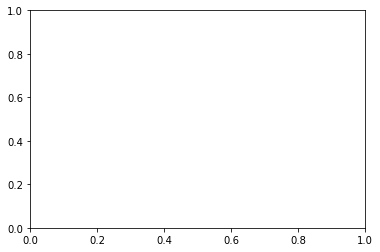

In [14]:
plt.hist(paired_ds['USDM'].sel(index=usdm_zeros).values.ravel())

It's just empty? Huh. What are these dates?

In [15]:
paired_ds['USDM Date'].sel(index=usdm_zeros)

<xarray.DataArray 'USDM Date' (index: 106)>
array(['2008-02-12T00:00:00.000000000', '2008-02-19T00:00:00.000000000',
       '2008-02-26T00:00:00.000000000', '2008-03-04T00:00:00.000000000',
       '2008-09-16T00:00:00.000000000', '2008-09-23T00:00:00.000000000',
       '2008-09-30T00:00:00.000000000', '2008-10-07T00:00:00.000000000',
       '2008-10-14T00:00:00.000000000', '2008-10-21T00:00:00.000000000',
       '2008-10-28T00:00:00.000000000', '2008-11-04T00:00:00.000000000',
       '2008-11-11T00:00:00.000000000', '2012-06-19T00:00:00.000000000',
       '2012-06-26T00:00:00.000000000', '2012-07-03T00:00:00.000000000',
       '2012-07-10T00:00:00.000000000', '2012-07-17T00:00:00.000000000',
       '2012-07-24T00:00:00.000000000', '2012-07-31T00:00:00.000000000',
       '2012-08-07T00:00:00.000000000', '2012-08-14T00:00:00.000000000',
       '2012-08-21T00:00:00.000000000', '2012-08-28T00:00:00.000000000',
       '2012-09-04T00:00:00.000000000', '2012-09-11T00:00:00.000000000',
       '2012-09-18T00:00:00.000000000', '2012-09-25T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-10-09T00:00:00.000000000',
       '2012-10-16T00:00:00.000000000', '2012-10-23T00:00:00.000000000',
       '2012-10-30T00:00:00.000000000', '2012-11-06T00:00:00.000000000',
       '2012-11-13T00:00:00.000000000', '2012-11-20T00:00:00.000000000',
       '2012-11-27T00:00:00.000000000', '2012-12-04T00:00:00.000000000',
       '2012-12-11T00:00:00.000000000', '2012-12-18T00:00:00.000000000',
       '2012-12-25T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-01-15T00:00:00.000000000', '2013-01-22T00:00:00.000000000',
       '2013-01-29T00:00:00.000000000', '2013-02-05T00:00:00.000000000',
       '2013-02-12T00:00:00.000000000', '2013-02-19T00:00:00.000000000',
       '2013-02-26T00:00:00.000000000', '2013-03-05T00:00:00.000000000',
       '2013-03-12T00:00:00.000000000', '2013-03-19T00:00:00.000000000',
       '2013-03-26T00:00:00.000000000', '2013-04-02T00:00:00.000000000',
       '2013-04-09T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2015-12-08T00:00:00.000000000', '2015-12-15T00:00:00.000000000',
       '2015-12-22T00:00:00.000000000', '2015-12-29T00:00:00.000000000',
       '2016-01-05T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
       '2016-01-19T00:00:00.000000000', '2016-01-26T00:00:00.000000000',
       '2016-02-02T00:00:00.000000000', '2016-02-09T00:00:00.000000000',
       '2016-02-16T00:00:00.000000000', '2016-02-23T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-03-08T00:00:00.000000000',
       '2016-03-15T00:00:00.000000000', '2016-03-22T00:00:00.000000000',
       '2016-03-29T00:00:00.000000000', '2016-04-05T00:00:00.000000000',
       '2016-04-12T00:00:00.000000000', '2016-04-19T00:00:00.000000000',
       '2016-04-26T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-10T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
       '2016-06-07T00:00:00.000000000', '2016-06-14T00:00:00.000000000',
       '2016-06-21T00:00:00.000000000', '2016-06-28T00:00:00.000000000',
       '2016-07-05T00:00:00.000000000', '2016-07-12T00:00:00.000000000',
       '2016-07-19T00:00:00.000000000', '2016-07-26T00:00:00.000000000',
       '2016-08-02T00:00:00.000000000', '2016-08-09T00:00:00.000000000',
       '2016-08-16T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-09-08T00:00:00.000000000', '2020-09-15T00:00:00.000000000',
       '2020-09-22T00:00:00.000000000', '2020-09-29T00:00:00.000000000',
       '2020-10-06T00:00:00.000000000', '2020-10-13T00:00:00.000000000',
       '2020-10-20T00:00:00.000000000', '2020-10-27T00:00:00.000000000',
       '2021-03-09T00:00:00.000000000', '2021-03-23T00:00:00.000000000',
       '2021-03-30T00:00:00.000000000', '2021-04-06T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * index    (index) int64 423 424 425 426 

Okay, well when I look up the first one on the USDM site, there's def data, just not for WA. March 5th 2019 is also in there, and there is drought data in WA for that date on the USDM maps, so it's not just a lack of data in WA.

In [16]:
usdm_wa = xr.open_dataset(f'{dm_path}/usdm/USDM_WA_20000104_20220412.nc')

/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

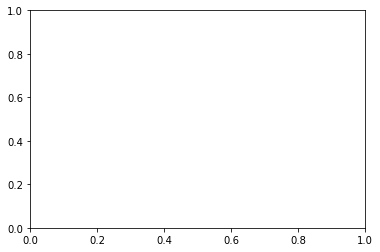

In [17]:
plt.hist(usdm_wa['USDM'].sel(date=paired_ds['USDM Date'].sel(index=usdm_zeros)).values.ravel())

Okay ... not looking like my fault ... let's check CONUS in case it was a random clipping error?

In [18]:
usdm_conus = xr.open_dataset(f'{dm_path}/usdm/USDM_CONUS_20000104_20220412.nc')

/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

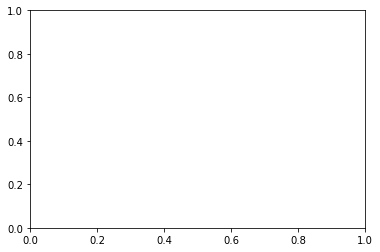

In [19]:
plt.hist(usdm_conus['USDM'].sel(date=paired_ds['USDM Date'].sel(index=usdm_zeros)).values.ravel())

What if I look at the individual file?

In [20]:
USDM_20080212 = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/usdm/Global/USDM_20080212.nc')['__xarray_dataarray_variable__']

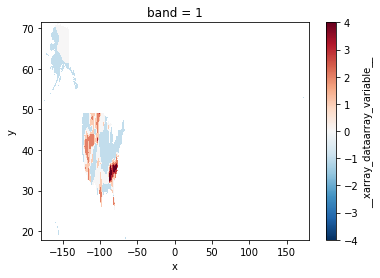

In [21]:
USDM_20080212.plot()

Okay ... so the data is there ..

Let's try to clip it again

In [22]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)
wa_gdf = states_gdf[(states_gdf.NAME=='Washington')]

In [23]:
USDM_20080212 = USDM_20080212.rio.write_crs('EPSG:4326')
USDM_20080212

<xarray.DataArray '__xarray_dataarray_variable__' (band: 1, y: 2142, x: 14358)>
[30754836 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -179.1 -179.1 -179.1 -179.1 ... 179.7 179.8 179.8
  * y            (y) float64 71.4 71.37 71.35 71.32 ... 17.95 17.92 17.9 17.87
    spatial_ref  int64 0
Attributes:
    grid_mapping:  spatial_ref

In [24]:
USDM_20080212_states = wrangle.clip_xarray(USDM_20080212, states_gdf)

In [25]:
states_gdf[states_gdf.NAME=='Washington']

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
47,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-122.51954 48.28831, -122.5227..."


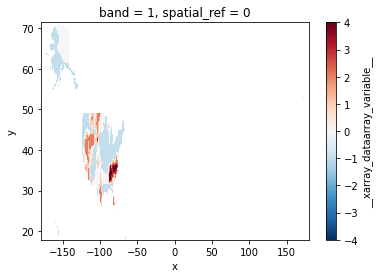

In [26]:
USDM_20080212.plot()

In [27]:
USDM_20080212_wa = wrangle.clip_xarray(USDM_20080212, states_gdf[states_gdf.NAME=='Washington'])

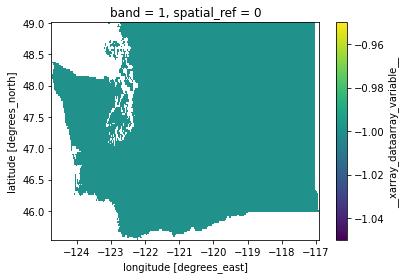

In [28]:
USDM_20080212_wa.plot()

Okay. SO like that all works. I'm confused. Maybe I should just rerun things? Maybe it got interrupted at some point? Idk

Is it in the CONUS clippings?

In [29]:
USDM_CONUS_20080212 = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/usdm/CONUS/USDM_20080212.nc')

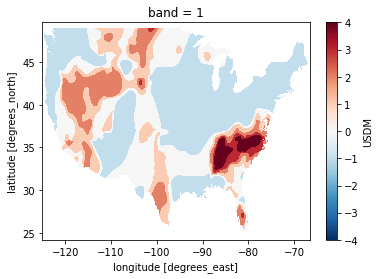

In [30]:
USDM_CONUS_20080212['USDM'].plot()

Okay, that's there ...

Is it in the combined?

In [31]:
USDM_CONUS_all = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/usdm/USDM_CONUS_20000104_20220412.nc')

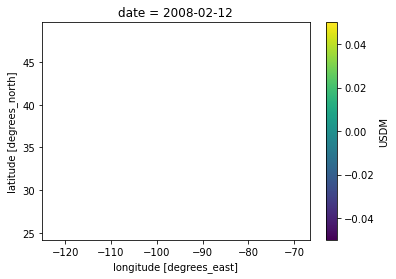

In [32]:
USDM_CONUS_all['USDM'].sel(date='2008-02-12').plot()

So that's where it disappears.

States?

In [33]:
USDM_WA_20080212 = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/usdm/WA/USDM_20080212.nc')

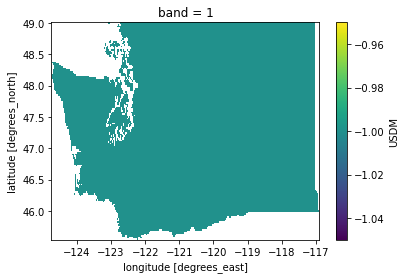

In [34]:
USDM_WA_20080212['USDM'].plot()

In [35]:
USDM_WA_all = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/usdm/USDM_WA_20000104_20220412.nc')

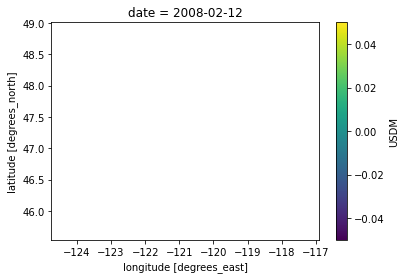

In [36]:
USDM_WA_all['USDM'].sel(date='2008-02-12').plot()

And not there either.

I'm going to try rerunning those merges ...

Okay, so I reran it, and the issue persists.